# Varying Bin Size of Initial Digitization

In [15]:
#import all modules 
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import os
from numpy import asarray, save, load
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, f1_score, recall_score, roc_auc_score, precision_score

### Load Bin Sizes and Create Validation Test Dataset

In [8]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_10.0")

#changes current working directory to the path given 
directory = os.chdir(path)

#load data 
bin_a_data = np.load('combined_train_10.0.npy', allow_pickle=True)
bin_a_df = pd.DataFrame(bin_a_data)

# Create feature and target arrays
X_bin_a = bin_a_df.drop(102, axis=1) 
y_bin_a = bin_a_df[102].astype('int') #last column is the modified or not modified feature

#split into training and test set
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_bin_a, y_bin_a, test_size = 0.22, random_state=1, stratify=y_bin_a)

In [9]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_1.0")

#changes current working directory to the path given 
directory = os.chdir(path)

#load data 
bin_b_data = np.load('combined_train_1.0.npy', allow_pickle=True)
bin_b_df = pd.DataFrame(bin_b_data)

# Create feature and target arrays
X_bin_b = bin_b_df.drop(1013, axis=1) 
y_bin_b = bin_b_df[1013].astype('int') #last column is the modified or not modified feature

#split into training and test set
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bin_b, y_bin_b, test_size = 0.22, random_state=1, stratify=y_bin_b)

In [10]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.1")

#changes current working directory to the path given 
directory = os.chdir(path)

# load data 
bin_c_data = np.load('combined_train_0.1.npy', allow_pickle=True)
bin_c_df = pd.DataFrame(bin_c_data)

# Create feature and target arrays
X_bin_c = bin_c_df.drop(10130, axis=1) 
y_bin_c = bin_c_df[10130].astype('int') #last column is the modified or not modified feature

#split into training and test set
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_bin_c, y_bin_c, test_size = 0.22, random_state=1, stratify=y_bin_c)

In [11]:
# Insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.01/")

# Change current working directory to the path given 
directory = os.chdir(path)

# Load data file 
loaded_data = np.load('all_train_data_0.01_with_2+.npy', allow_pickle=True)
df = pd.DataFrame(loaded_data)

# Create feature and target arrays
X = df.drop(101300, axis=1) 
y = df[101300].astype('int') #last column is the modified or not modified feature

# Split into training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state=1, stratify=y)

### Model Using Logistic Regression
SVM applied as it was found to be the most optimal machine learning algorithm for our dataset. 

In [16]:
# Setup a pipeline with a LR Classifier with adjusted hyperparameter settings
LR_pipe = Pipeline([
        ('reducer', PCA(n_components=2)),
        ('classifier', LogisticRegression(solver='lbfgs',penalty='l2',C=10, max_iter =500))])

# Define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=1)

# Define scoring parameters that will go into cross_validate
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'roc_auc': 'roc_auc',
           'f1_score' : make_scorer(f1_score)}

## Visualise Accuracy Comparisons

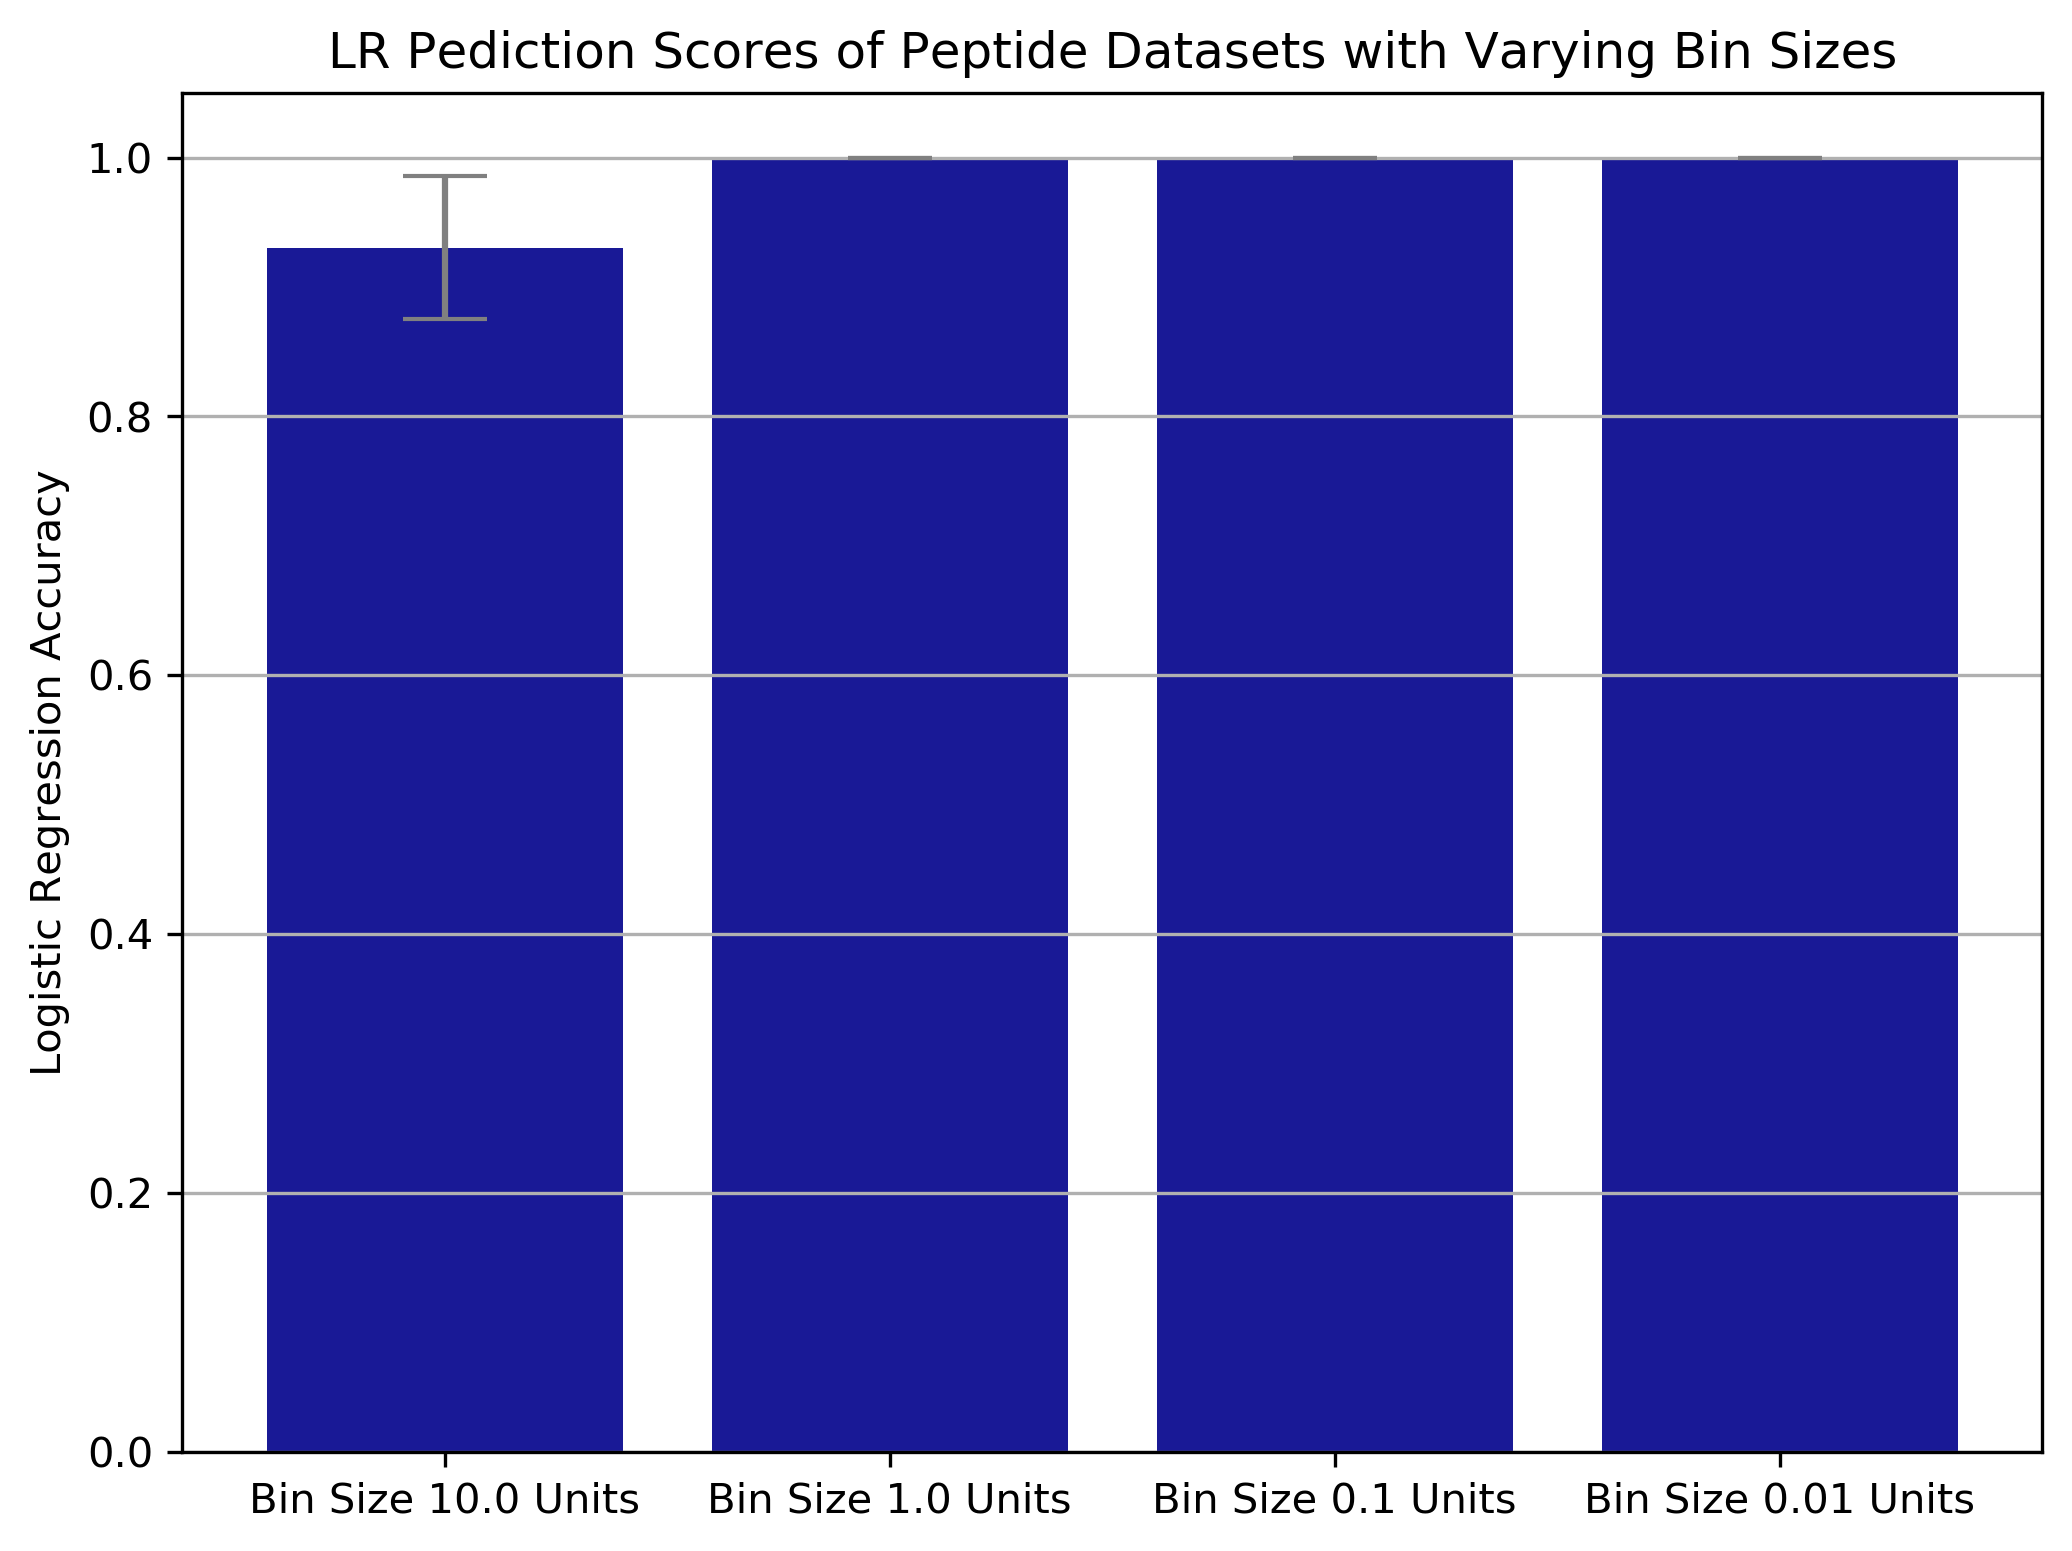

In [25]:
# Fit onto dataset with bin size 10.0 mass units. 
LR_pipe.fit(X_train_a, y_train_a)

# Calculate the mean score from cross validation for bin size 10.0 mass units. 
bin_a_score = cross_val_score(LR_pipe, X_bin_a, y_bin_a, scoring="accuracy", cv=cv).mean()
bin_a_std = cross_val_score(LR_pipe, X_bin_a, y_bin_a, scoring="accuracy", cv=cv).std()


# Fit onto dataset with bin size 1.0 mass units. 
LR_pipe.fit(X_train_b, y_train_b)

# Calculate the mean score from cross validation for bin size 1.0 mass units. 
bin_b_score = cross_val_score(LR_pipe, X_bin_b, y_bin_b, scoring="accuracy", cv=cv).mean()
bin_b_std = cross_val_score(LR_pipe, X_bin_b, y_bin_b, scoring="accuracy", cv=cv).std()


# Fit onto dataset with bin size 0.1 mass units. 
LR_pipe.fit(X_train_c, y_train_c)

# Calculate the mean score from cross validation for bin size 0.1 mass units. 
bin_c_score = cross_val_score(LR_pipe, X_bin_c, y_bin_c, scoring="accuracy", cv=cv).mean()
bin_c_std = cross_val_score(LR_pipe, X_bin_c, y_bin_c, scoring="accuracy", cv=cv).std()


# Fit onto dataset with bin size 0.01 mass units. 
LR_pipe.fit(X_train, y_train)

# Calculate the mean score from cross validation for bin size 0.01 mass units. 
bin_score = cross_val_score(LR_pipe, X, y, scoring="accuracy", cv=cv).mean()
bin_std = cross_val_score(LR_pipe, X, y, scoring="accuracy", cv=cv).std()


# Assign data variables that will input into bar chart. 
bins = ['Bin Size 10.0 Units', 'Bin Size 1.0 Units', 'Bin Size 0.1 Units', 'Bin Size 0.01 Units']
x_pos = np.arange(len(bins))
scores = [bin_a_score, bin_b_score, bin_c_score, bin_score]
error = [bin_a_std, bin_b_std, bin_c_std, bin_std]

# Build bar chart of socres.
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
ax.bar(x_pos, scores, yerr=error, align='center', color='darkblue', alpha=0.9, ecolor='grey', capsize=10)
ax.set_ylabel('Logistic Regression Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(bins)
ax.set_title('LR Pediction Scores of Peptide Datasets with Varying Bin Sizes')
ax.yaxis.grid(True)
plt.show()


In [20]:
# Use the cross_validate function to see what happens in each fold
bin_a_validate = cross_validate(LR_pipe, X_bin_a, y_bin_a, cv=cv, scoring=scoring, n_jobs=-1)

# Use the cross_validate function to see what happens in each fold
bin_b_validate = cross_validate(LR_pipe, X_bin_b, y_bin_b, cv=cv, scoring=scoring, n_jobs=-1)

# Use the cross_validate function to see what happens in each fold
bin_c_validate = cross_validate(LR_pipe, X_bin_c, y_bin_c, cv=cv, scoring=scoring, n_jobs=-1)

# Use the cross_validate function to see what happens in each fold
bin_validate = cross_validate(LR_pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)

# Extract the specific values from the cross validation of the test set
a_accuracy = np.mean(bin_a_validate['test_accuracy']), np.std(bin_a_validate['test_accuracy'])
a_fit_time = np.mean(bin_a_validate['fit_time']), np.std(bin_a_validate['fit_time'])
a_score_time = np.mean(bin_a_validate['score_time']), np.std(bin_a_validate['score_time'])
a_roc_auc = np.mean(bin_a_validate['test_roc_auc']), np.std(bin_a_validate['test_roc_auc'])
a_f1 = np.mean(bin_a_validate['test_f1_score']), np.std(bin_a_validate['test_f1_score'])

# Extract the specific values from the cross validation of the test set
b_accuracy = np.mean(bin_b_validate['test_accuracy']), np.std(bin_b_validate['test_accuracy'])
b_fit_time = np.mean(bin_b_validate['fit_time']), np.std(bin_b_validate['fit_time'])
b_score_time = np.mean(bin_b_validate['score_time']), np.std(bin_b_validate['score_time'])
b_roc_auc = np.mean(bin_b_validate['test_roc_auc']), np.std(bin_b_validate['test_roc_auc'])
b_f1 = np.mean(bin_b_validate['test_f1_score']), np.std(bin_b_validate['test_f1_score'])

# Extract the specific values from the cross validation of the test set
c_accuracy = np.mean(bin_c_validate['test_accuracy']), np.std(bin_c_validate['test_accuracy'])
c_fit_time = np.mean(bin_c_validate['fit_time']), np.std(bin_c_validate['fit_time'])
c_score_time = np.mean(bin_c_validate['score_time']), np.std(bin_c_validate['score_time'])
c_roc_auc = np.mean(bin_c_validate['test_roc_auc']), np.std(bin_c_validate['test_roc_auc'])
c_f1 = np.mean(bin_c_validate['test_f1_score']), np.std(bin_c_validate['test_f1_score'])

# Extract the specific values from the cross validation of the test set
accuracy = np.mean(bin_validate['test_accuracy']), np.std(bin_validate['test_accuracy'])
fit_time = np.mean(bin_validate['fit_time']), np.std(bin_validate['fit_time'])
score_time = np.mean(bin_validate['score_time']), np.std(bin_validate['score_time'])
roc_auc = np.mean(bin_validate['test_roc_auc']), np.std(bin_validate['test_roc_auc'])
f1 = np.mean(bin_validate['test_f1_score']), np.std(bin_validate['test_f1_score'])

# Report Performance
print('=== Logistic Regression Bin Size 10.0 Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (a_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (a_fit_time))
print('Average Score Time: %.3f (%.3f)' % (a_score_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (a_roc_auc))
print('Average F1 Score: %.3f (%.3f)' % (a_f1))
print('\n')
print('=== Logistic Regression Bin Size 1.0 Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (b_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (b_fit_time))
print('Average Score Time: %.3f (%.3f)' % (b_score_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (b_roc_auc))
print('Average F1 Score: %.3f (%.3f)' % (b_f1))
print('\n')
print('=== Logistic Regression Bin Size 0.1 Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (c_accuracy))
print('Average Fit Time: %.3f (%.3f)' % (c_fit_time))
print('Average Score Time: %.3f (%.3f)' % (c_score_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (c_roc_auc))
print('Average F1 Score: %.3f (%.3f)' % (c_f1))
print('\n')
print('=== Logistic Regression Bin Size 0.01 Scores ===')
print('Average Test Accuracy: %.3f (%.3f)' % (accuracy))
print('Average Fit Time: %.3f (%.3f)' % (fit_time))
print('Average Score Time: %.3f (%.3f)' % (score_time))
print('Average Fit Test ROC & AUC: %.3f (%.3f)' % (roc_auc))
print('Average F1 Score: %.3f (%.3f)' % (f1))

=== Logistic Regression Bin Size 10.0 Scores ===
Average Test Accuracy: 0.930 (0.055)
Average Fit Time: 0.041 (0.023)
Average Score Time: 0.037 (0.028)
Average Fit Test ROC & AUC: 0.974 (0.029)
Average F1 Score: 0.912 (0.069)


=== Logistic Regression Bin Size 1.0 Scores ===
Average Test Accuracy: 1.000 (0.000)
Average Fit Time: 0.043 (0.011)
Average Score Time: 0.030 (0.013)
Average Fit Test ROC & AUC: 1.000 (0.000)
Average F1 Score: 1.000 (0.000)


=== Logistic Regression Bin Size 0.1 Scores ===
Average Test Accuracy: 1.000 (0.000)
Average Fit Time: 0.132 (0.037)
Average Score Time: 0.060 (0.006)
Average Fit Test ROC & AUC: 1.000 (0.000)
Average F1 Score: 1.000 (0.000)


=== Logistic Regression Bin Size 0.01 Scores ===
Average Test Accuracy: 1.000 (0.000)
Average Fit Time: 1.389 (0.225)
Average Score Time: 0.470 (0.083)
Average Fit Test ROC & AUC: 1.000 (0.000)
Average F1 Score: 1.000 (0.000)
